In [3]:
import torch
import torchvision
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset

In [8]:
transform = T.Compose([
    T.ToTensor(),
    T.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
batch_size = 4
train_set = torchvision.datasets.CIFAR10(root='./data',
                      train=True,
                      download=True,
                      transform=transform)
trainloader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
test_set = torchvision.datasets.CIFAR10(root='./data',
                      train=False,
                      download=True,
                      transform=transform)
testloader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane','car','bird','cat','deer','dog','frog','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


In [9]:
import matplotlib.pyplot as plt
import numpy as np

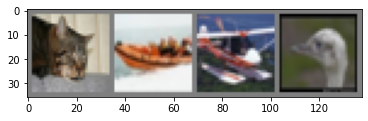

  cat truck plane  bird


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [15]:
import torch.nn as nn
import torch.nn.functional as F

In [32]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [33]:
import torch.optim as optim

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum=0.9)

In [35]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.075
[1,  4000] loss: 1.950
[1,  6000] loss: 1.971
[1,  8000] loss: 1.968
[1, 10000] loss: 1.943
[1, 12000] loss: 1.955
[2,  2000] loss: 1.980
[2,  4000] loss: 1.982
[2,  6000] loss: 1.998
[2,  8000] loss: 2.043
[2, 10000] loss: 2.000
[2, 12000] loss: 2.005
Finished Training


In [36]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

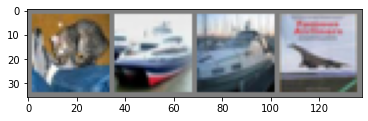

GroundTruth:    cat truck truck plane


In [37]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))